In [1]:
using CARMA
using Ensemble
using LombScargle
using PyCall
using PyPlot

@pyimport seaborn as sns

sns.set_style("ticks")
sns.set_context("notebook")
sns.set_palette("colorblind")

In [8]:
files = String[]
nlt5 = Int[]
for f in readdir("../vels/")
    data = readdlm(joinpath("..", "vels", f))
    dts = diff(data[:,1])
    n = sum(dts .< 5/(60.0*24.0))
    push!(files, f)
    push!(nlt5, n)
end
filequeue = Collections.PriorityQueue(files, nlt5, Base.Order.Reverse)

Base.Collections.PriorityQueue{String,Int64,Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}} with 1699 entries:
  "HD30339_KECK.vels"    => 0
  "HIP14113_KECK.vels"   => 0
  "HIP46199_KECK.vels"   => 0
  "HD26965_KECK.vels"    => 173
  "HD224693_KECK.vels"   => 0
  "HD804_KECK.vels"      => 0
  "HTR196-004_KECK.vels" => 0
  "HD1770_KECK.vels"     => 0
  "HD159063_KECK.vels"   => 0
  "HD190007_KECK.vels"   => 0
  "HD97601_KECK.vels"    => 0
  "HD115617_KECK.vels"   => 373
  "HIP54532_KECK.vels"   => 0
  "HD173818_KECK.vels"   => 0
  "HD159868_KECK.vels"   => 29
  "HD95088_KECK.vels"    => 0
  "HD101501_KECK.vels"   => 1
  "HIP15312_KECK.vels"   => 0
  "HD198483_KECK.vels"   => 0
  "HD22879_KECK.vels"    => 8
  "HD48938_KECK.vels"    => 0
  "HD219538_KECK.vels"   => 10
  "HD134987_KECK.vels"   => 4
  "HD88072_KECK.vels"    => 0
  "HD116258_KECK.vels"   => 0
  ⋮                      => ⋮

This is one of the most-measured stars, B-V ~ 0.7, Guy says it might have some good modes.

In [3]:
fmax = Collections.dequeue!(filequeue)
fnext = Collections.dequeue!(filequeue)
(fmax, fnext)

("HD185144_KECK.vels","HD10700_KECK.vels")

In [9]:
function postprocess_plots(state_file)
    post, ns = open(deserialize, state_file)
    postsamples, lnprobs = EnsembleNest.postsample(ns)
    figure()
    for i in 1:5
        r, dr = Kalman.residuals(post, postsamples[:,rand(1:size(postsamples,2))])
        errorbar(post.ts, r, dr, fmt=".", alpha=0.1)
    end
    title("Residuals")
    figure()
    all_ts = sort(vcat(collect(linspace(minimum(post.ts), maximum(post.ts), 256)), post.ts))
    py, vpy = Kalman.predict(post, postsamples[:,rand(1:size(postsamples,2))], all_ts)
    dpy = sqrt(vpy)
    errorbar(post.ts, post.ys, post.dys, fmt=".", color="k", alpha=0.25)
    plot(all_ts, py, color=sns.color_palette()[1])
    fill_between(all_ts, py+dpy, py-dpy, alpha=0.25, color=sns.color_palette()[1])
    title("Prediction")
    figure()
    fs = Kalman.psdfreq(post)
    fs = exp(log(minimum(fs)):0.05:log(maximum(fs)))
    psds = Kalman.psd(post, postsamples, fs)
    nfs = size(fs, 1)
    l = zeros(nfs)
    m = zeros(nfs)
    h = zeros(nfs)
    for i in 1:nfs
        l[i] = quantile(vec(psds[i,:]), 0.16)
        m[i] = quantile(vec(psds[i,:]), 0.5)
        h[i] = quantile(vec(psds[i,:]), 0.84)
    end
    loglog(fs, m)
    fill_between(fs, h, l, color=sns.color_palette()[1], alpha=0.25)
    lnZ, dlnZ = EnsembleNest.logZ(ns)
    println(@sprintf("ln(Z) = %.2f +/- %.2f", lnZ, dlnZ))
end

postprocess_plots (generic function with 1 method)

In [10]:
function logl(x)
    @assert false
end
function logp(x)
    @assert false
end

logp (generic function with 1 method)

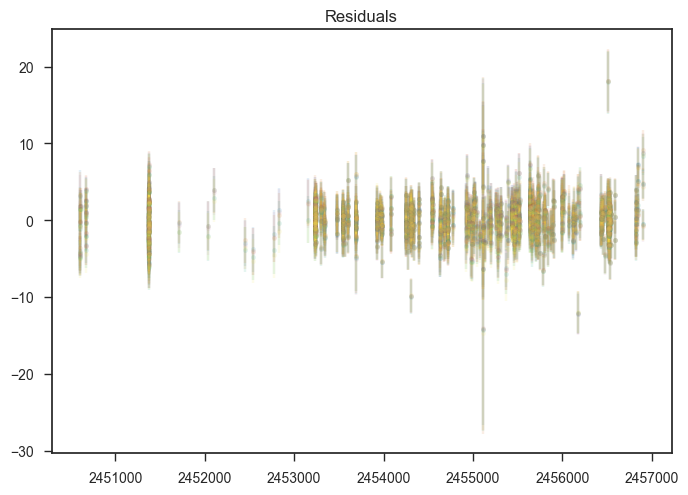

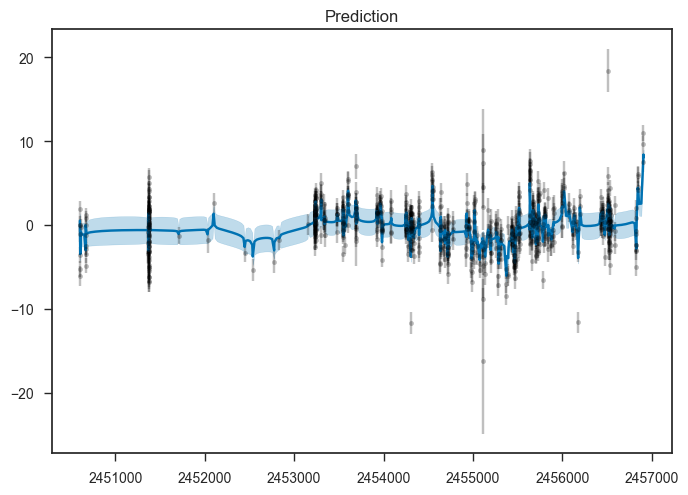

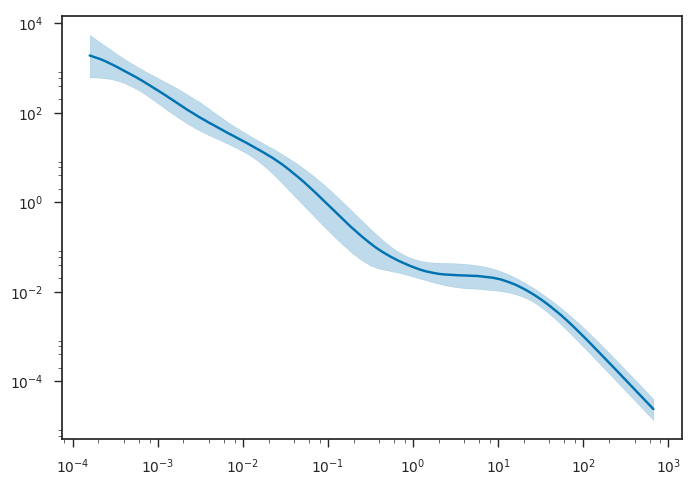

ln(Z) = -1736.50 +/- 0.08


In [28]:
postprocess_plots("../runs/HD185144/state-3-2.dat")

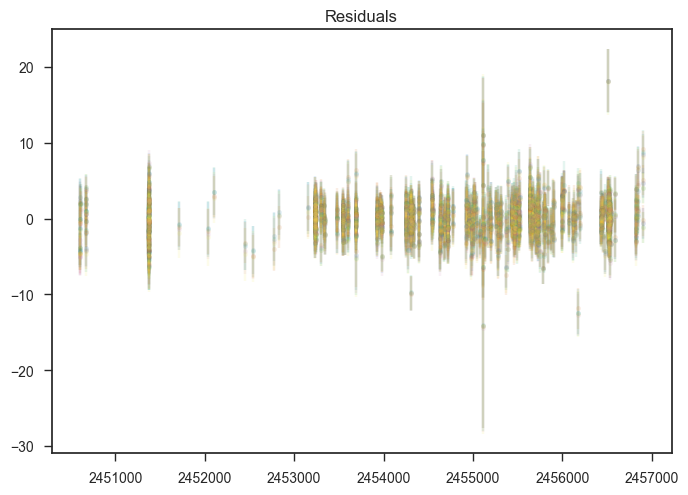

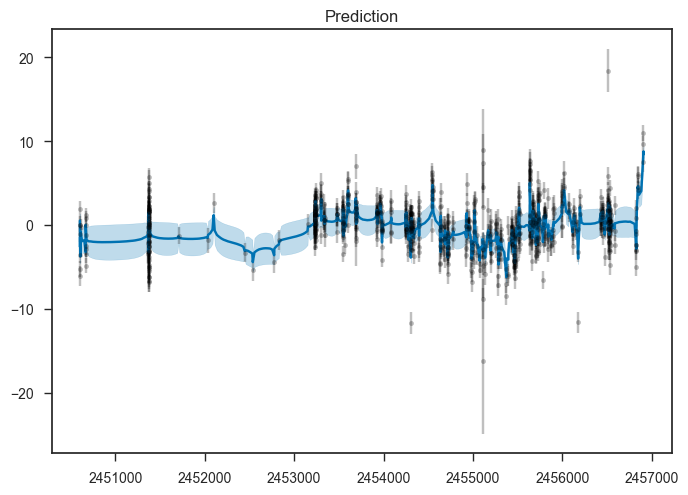

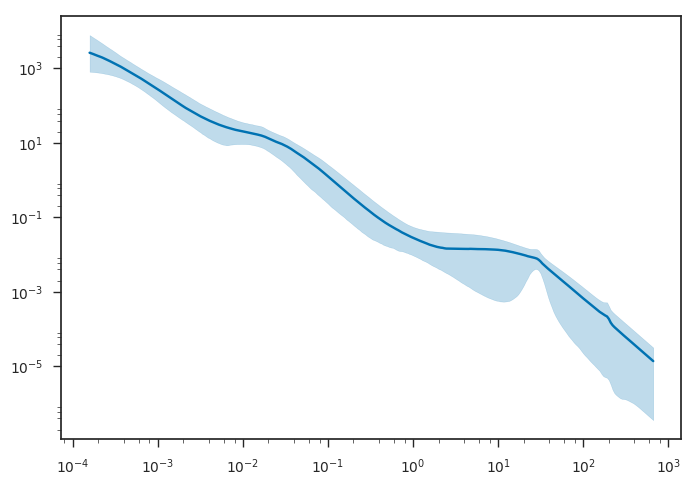

ln(Z) = -1736.43 +/- 0.08


In [29]:
postprocess_plots("../runs/HD185144/state-5-4.dat")

In [4]:
filequeue["HD1461_KECK.vels"]

421

In [2]:
vels = readdlm("../vels/HD1461_KECK.vels")

679×7 Array{Float64,2}:
 2.45037e6   0.57  1.12   0.1443  -1.0      187432.0  150.0
 2.45072e6  -4.56  1.18   0.1606  -1.0      123883.0  155.0
 2.45079e6  -7.22  1.2    0.1569  -1.0      251612.0  250.0
 2.45101e6  -2.14  1.13   0.152   -1.0      123118.0   75.0
 2.45107e6  -5.27  1.17   0.1527  -1.0      124353.0  100.0
 2.45117e6   2.59  1.13   0.1591  -1.0      132169.0  110.0
 2.45134e6   2.6   1.25   0.1556  -1.0       80484.0   60.0
 2.45137e6  -1.33  1.39   0.1521  -1.0       72366.0   40.0
 2.45155e6   1.3   1.16   0.1432  -1.0       89691.0   72.0
 2.45188e6   2.3   1.37   0.145   -1.0       77981.0   70.0
 2.4521e6   -3.55  1.21   0.1174  -1.0       87539.0   54.0
 2.45224e6  -0.95  1.25   0.1339  -1.0      103512.0   57.0
 2.45249e6  -3.44  1.44   0.1461  -1.0       93073.0   50.0
 ⋮                                               ⋮         
 2.45664e6  -1.54  1.3    0.146    0.03108   50817.0   26.0
 2.45664e6   1.36  1.26   0.1507   0.03105   51045.0   32.0
 2.45668e6  -3.6

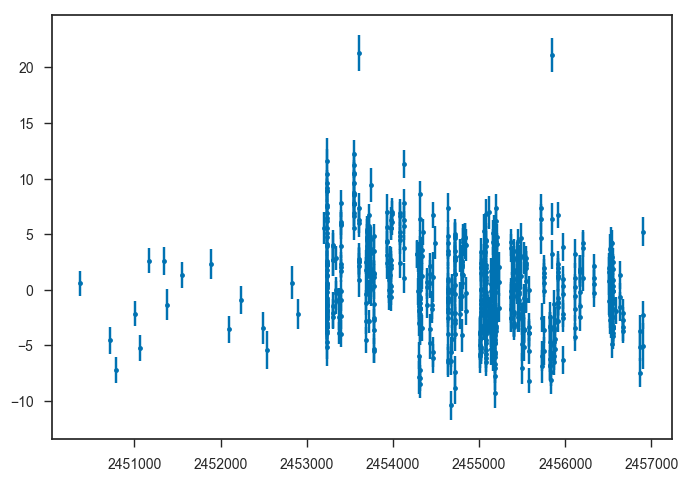

(PyObject <matplotlib.lines.Line2D object at 0x32b085828>,(),(PyObject <matplotlib.collections.LineCollection object at 0x31bcb7550>,))

In [3]:
errorbar(vels[:,1], vels[:,2], vels[:,3], fmt=".")

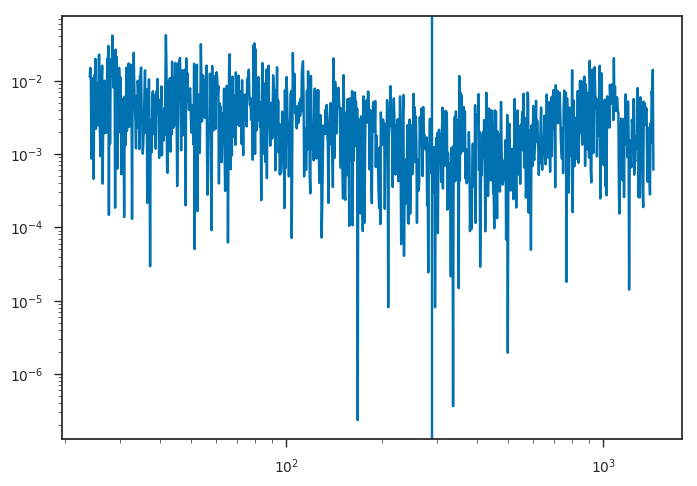

PyObject <matplotlib.lines.Line2D object at 0x32d8f6cf8>

In [4]:
oneperminute = 60.0*24.0
frequencies = logspace(log10(oneperminute/60.0), log10(oneperminute), 1000)
pgram = lombscargle(vels[:,1], vels[:,2], vels[:,3], frequencies=frequencies)
fs, pows = freqpower(pgram)
loglog(fs, pows)
axvline(1.0/(5.0/24.0/60.0))